# Problem 3 (Point Source-Sink)

## Problem Statement

For a square plate of edge length l = 1 metre, simulate the continuous evolution of the temperature map (with a time step of 0.01s, for a total of 2s) with the following conditions:

1. Temperature at all four edges is 0 degree Celsius
2. There is a point source (occasionally sink, you’ll realise soon why!) at the center, with a time varying temperature given as 10sin(pi*t) (Assume that steady state is achieved instantaneously with each time step, so you need not worry about the transient period. That is to say, that at each iteration, the heat map plotted represents the steady state)

Hint: At the beginning of each iteration, first set the temperature of the center grid point, using the sinusoidal formula. Then proceed to update the temperatures of all the other interior grid points. Also, produce the plot at each iteration.

## Solution:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

In [2]:
maxIter = 1000

dX = 0.1
dY = 0.1
lenX = 1 + dX
lenY = 1 + dY

Ttop = 0
Tbottom = 0
Tleft = 0
Tright = 0

Tguess = 0

In [3]:
colorInterpolation = 100
colorMap = plt.cm.jet

X, Y = np.meshgrid(np.arange(0, lenX, dX), np.arange(0, lenY, dY))

In [4]:
T = np.empty((int(lenY/dY), int(lenX/dX)))
T.fill(Tguess)

T[int(lenY/dY - 1):, :] = Ttop
T[:1, :] = Tbottom
T[:, int(lenX/dX - 1):] = Tright
T[:, :1] = Tleft

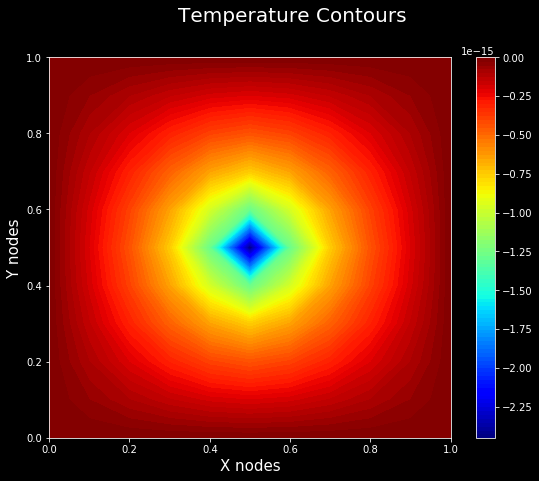

In [5]:
maxT = 2
dT = 0.01
maxIter = 500

for t in np.arange(0, maxT+dT, dT):

    T[int((lenY/dY-1)/2), int((lenX/dX-1)/2)] = 10*np.sin(np.pi*t)
    
    for iteration in range(maxIter):
        for j in range(1, int(lenX/dX) - 1):
            for i in range(1, int(lenY/dY) - 1):
                if i == int((lenY/dY-1)/2) and j == int((lenX/dX-1)/2):
                    continue
                T[i,j] = 0.25 * (T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1])

    plt.figure(figsize=[9, 7])
    plt.style.use('dark_background')
    plt.suptitle("Temperature Contours", fontsize=20)
    plt.contourf(X, Y, T, colorInterpolation, cmap=colorMap)
    plt.xlabel("X nodes", fontsize=15)
    plt.ylabel("Y nodes", fontsize=15)
    plt.colorbar()
    
    plt.pause(0.005)
    
    clear_output(wait=True)